<h2>Лабораторная работа №5</h2>
<h1 style="font-size: 30px; font-family: Georgia, serif;">Изучение моделей классификации и регрессии. </h1>

<h2>2. Набор данных Linnerrud </h2>

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_linnerud
linnerud = load_linnerud()

In [40]:
print("Keys of linnerud(): \n{}".format(linnerud.keys()))

Keys of linnerud(): 
dict_keys(['data', 'feature_names', 'target', 'target_names', 'frame', 'DESCR', 'data_filename', 'target_filename', 'data_module'])


In [41]:
print("Shape of the array data for linnerud dataset: {}".format(linnerud.data.shape))

Shape of the array data for linnerud dataset: (20, 3)


In [42]:
print("Name of the features:\n{}".format(linnerud.feature_names))

Name of the features:
['Chins', 'Situps', 'Jumps']


In [43]:
print("Name of the target:\n{}".format(linnerud.target_names))

Name of the target:
['Weight', 'Waist', 'Pulse']


In [44]:
print(linnerud['DESCR']+"\n...")

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

|details-start|
**References**
|details-split|

* Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
  Editions Technic.

|details-end|
...


In [45]:
linnerud_data = pd.DataFrame(linnerud.data, columns=linnerud.feature_names)
linnerud_data.head()

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0


In [46]:
linnerud_data2 = pd.DataFrame(linnerud.data, columns=linnerud.target_names)
linnerud_data2.head()

,Weight,Waist,Pulse
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0


In [47]:
linnerud_d = pd.merge(linnerud_data, linnerud_data2, left_index=True, right_index=True)

In [48]:
linnerud_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Chins   20 non-null     float64
 1   Situps  20 non-null     float64
 2   Jumps   20 non-null     float64
 3   Weight  20 non-null     float64
 4   Waist   20 non-null     float64
 5   Pulse   20 non-null     float64
dtypes: float64(6)
memory usage: 1.1 KB


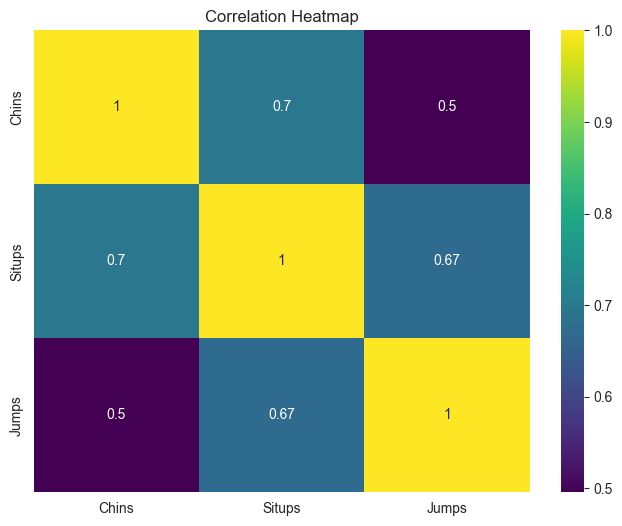

In [49]:
correlation_matrix = linnerud_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X, y = linnerud.data, linnerud.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15, 3)
(5, 3)
(15, 3)
(5, 3)


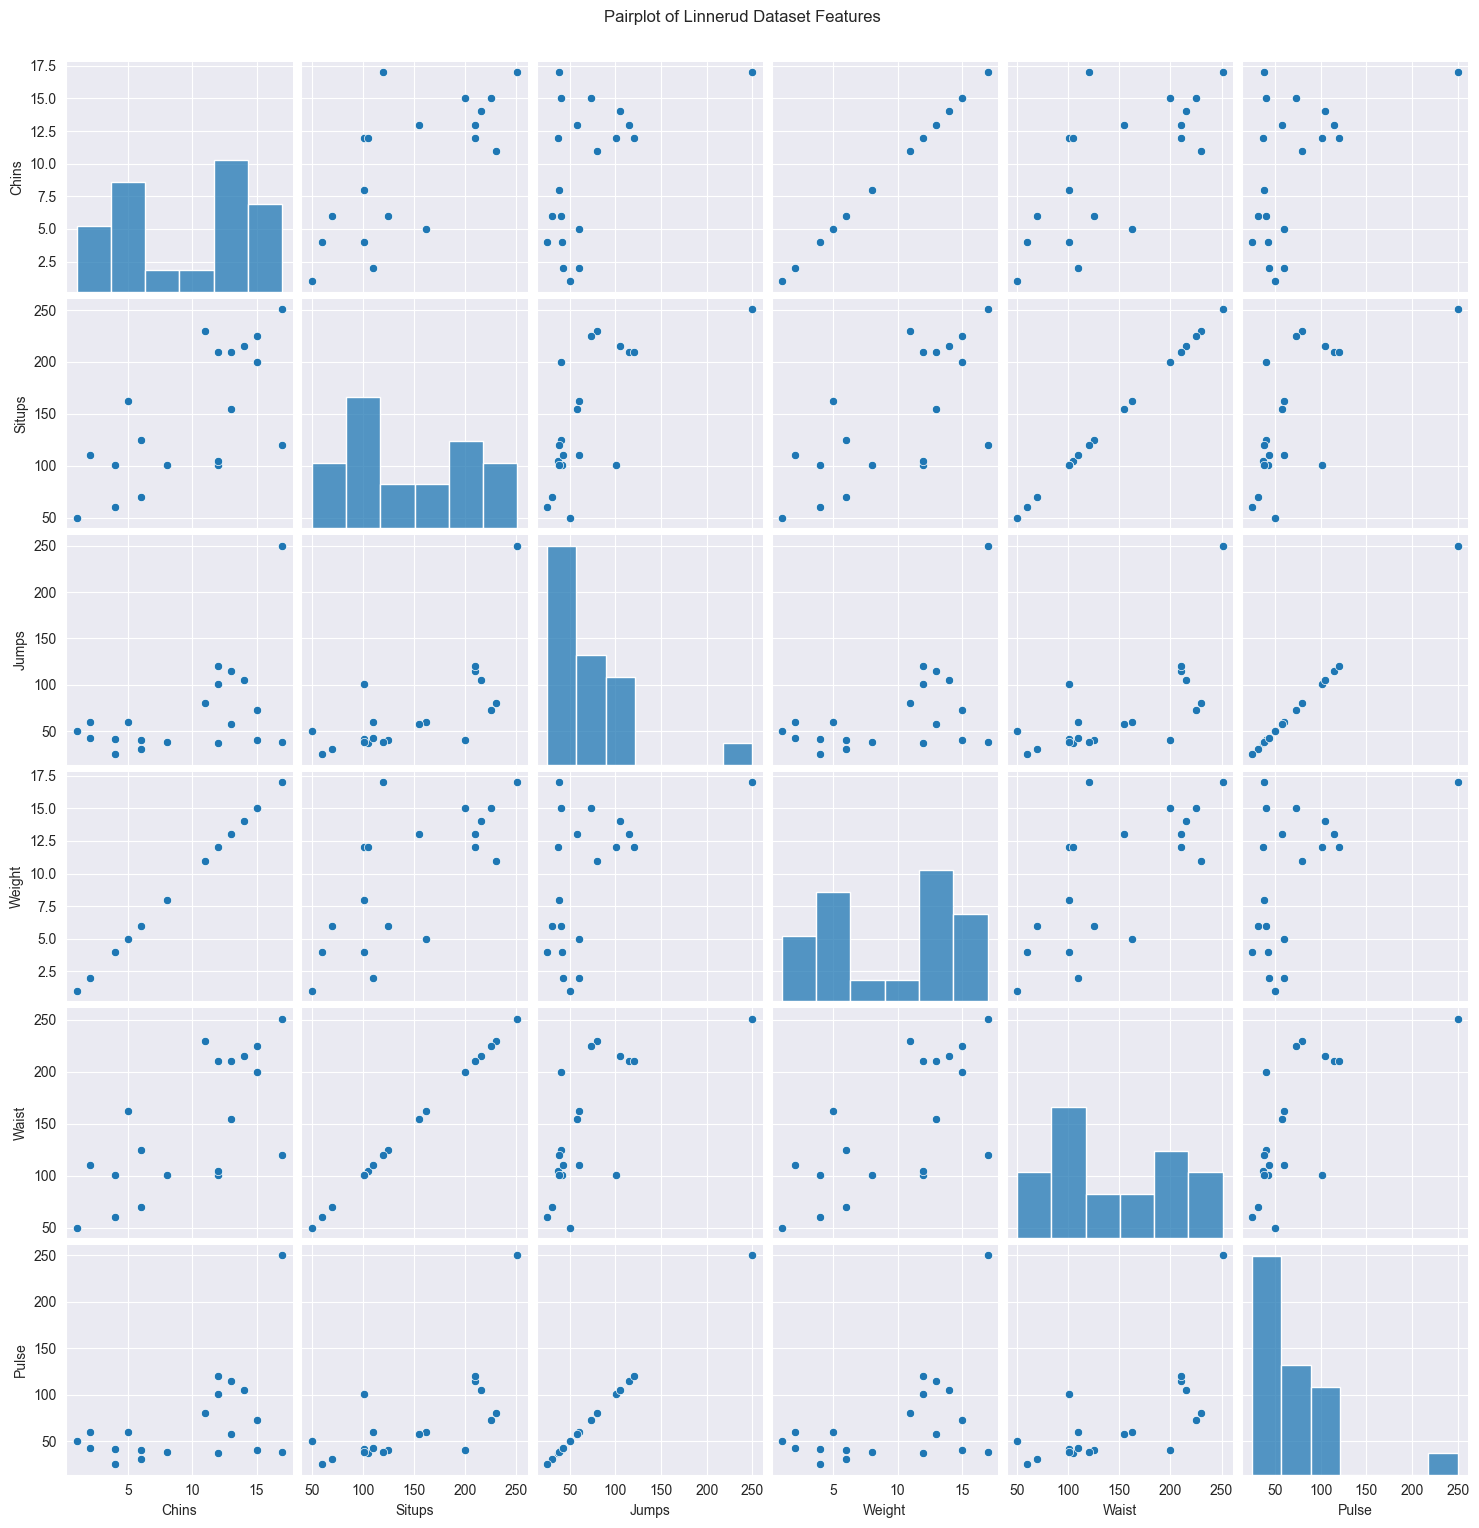

In [52]:
# Create pairplots for all combinations of features
sns.pairplot(linnerud_d)
plt.suptitle('Pairplot of Linnerud Dataset Features', y=1.02)
plt.show()

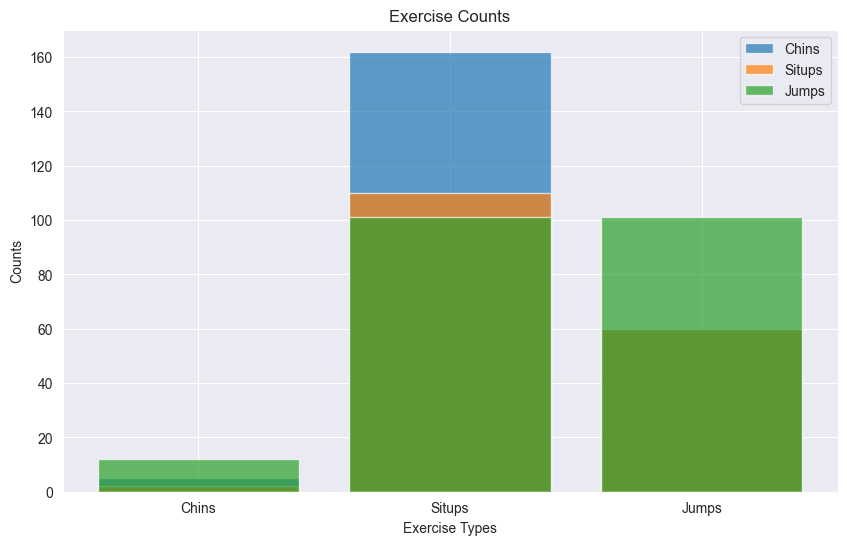

In [53]:
data = linnerud.data
feature_names = linnerud.feature_names

plt.figure(figsize=(10, 6))
plt.bar(feature_names, data[0], alpha=0.7, label='Chins')
plt.bar(feature_names, data[1], alpha=0.7, label='Situps')
plt.bar(feature_names, data[2], alpha=0.7, label='Jumps')
plt.xlabel('Exercise Types')
plt.ylabel('Counts')
plt.title('Exercise Counts')
plt.legend()
plt.show()

<h1>KNeighborsRegressor</h1>

In [54]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor1 = KNeighborsRegressor(n_neighbors=1)
knn_regressor1.fit(X_train, y_train)

knn_regressor3 = KNeighborsRegressor(n_neighbors=3)
knn_regressor3.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

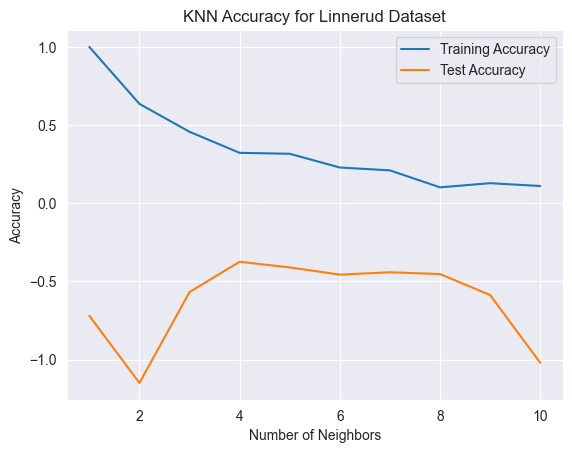

In [55]:
# Varying number of neighbors for the KNN model
neighbors_settings = range(1, 11)
training_accuracy = []
test_accuracy = []

for n_neighbors in neighbors_settings:
  
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))

    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label='Training Accuracy')
plt.plot(neighbors_settings, test_accuracy, label='Test Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Linnerud Dataset')
plt.legend()
plt.show()

In [56]:
print("Predictions on the test set with knn=1: \n{}".format(knn_regressor1.predict(X_test)))

Predictions on the test set with knn=1: 
[[157.  32.  52.]
 [182.  36.  56.]
 [182.  36.  56.]
 [191.  36.  50.]
 [167.  34.  60.]]


In [57]:
print("Predictions on the test set with knn=3: \n{}".format(knn_regressor3.predict(X_test)))

Predictions on the test set with knn=3: 
[[159.          33.          56.        ]
 [186.66666667  36.          57.33333333]
 [185.          36.33333333  58.        ]
 [179.          34.33333333  49.33333333]
 [180.          35.66666667  59.33333333]]


In [58]:
print("R^2 on the test set with knn=1: {:.2f}".format(knn_regressor1.score(X_test,y_test)))
print("R^2 on the test set with knn=3: {:.2f}".format(knn_regressor3.score(X_test,y_test)))

R^2 on the test set with knn=1: -0.72
R^2 on the test set with knn=3: -0.57


In [59]:
print("Correctness on the train set with knn=1: {:.2f}".format(knn_regressor1.score(X_train,y_train)))
print("Correctness on the train set with knn=3: {:.2f}".format(knn_regressor3.score(X_train,y_train)))

Correctness on the train set with knn=1: 1.00
Correctness on the train set with knn=3: 0.46


<h1>LinearRegression</h1>

In [60]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

In [61]:
print("lr.coef_:{}".format(lr.coef_))
print("lr.intercept_:{}".format(lr.intercept_))

lr.coef_:[[-2.55388075e+00 -1.87334813e-01  1.55632934e-01]
 [-3.25317265e-01 -3.72155297e-02  3.22483661e-02]
 [ 4.66624875e-01 -3.84735037e-03 -2.35434971e-03]]
lr.intercept_:[221.27779424  41.8405461   51.37162613]


In [62]:
print("Correctness on the train set: {:.2f}".format(lr.score(X_train,y_train)))
print("Correctness on the test set: {:.2f}".format(lr.score(X_test,y_test)))

Correctness on the train set: 0.38
Correctness on the test set: -1.24


<h1>Ridge</h1>

In [63]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
ridge100 = Ridge(alpha=100).fit(X_train,y_train)

In [64]:
print("Correctness on the train set: {:.2f}".format(ridge.score(X_train,y_train)))
print("Correctness on the test set: {:.2f}".format(ridge.score(X_test,y_test)))

Correctness on the train set: 0.38
Correctness on the test set: -1.23


In [65]:
print("Correctness on the train set: {:.2f}".format(ridge01.score(X_train,y_train)))
print("Correctness on the test set: {:.2f}".format(ridge01.score(X_test,y_test)))

Correctness on the train set: 0.38
Correctness on the test set: -1.24


In [66]:
print("Correctness on the train set: {:.2f}".format(ridge100.score(X_train,y_train)))
print("Correctness on the test set: {:.2f}".format(ridge100.score(X_test,y_test)))

Correctness on the train set: 0.37
Correctness on the test set: -0.72


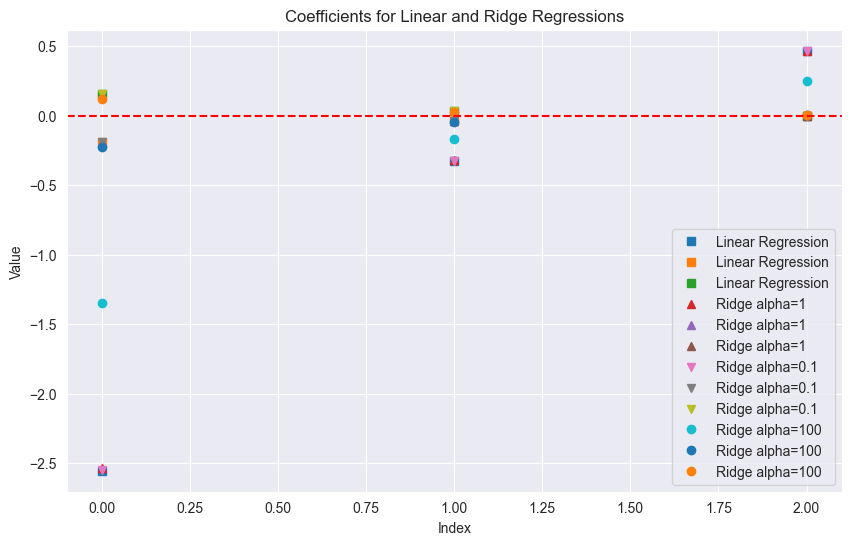

In [67]:
plt.figure(figsize=(10, 6))

plt.plot(lr.coef_, 's', label="Linear Regression")
plt.plot(ridge.coef_, '^', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(ridge100.coef_, 'o', label="Ridge alpha=100")

plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title("Coefficients for Linear and Ridge Regressions")
plt.legend()
plt.show()

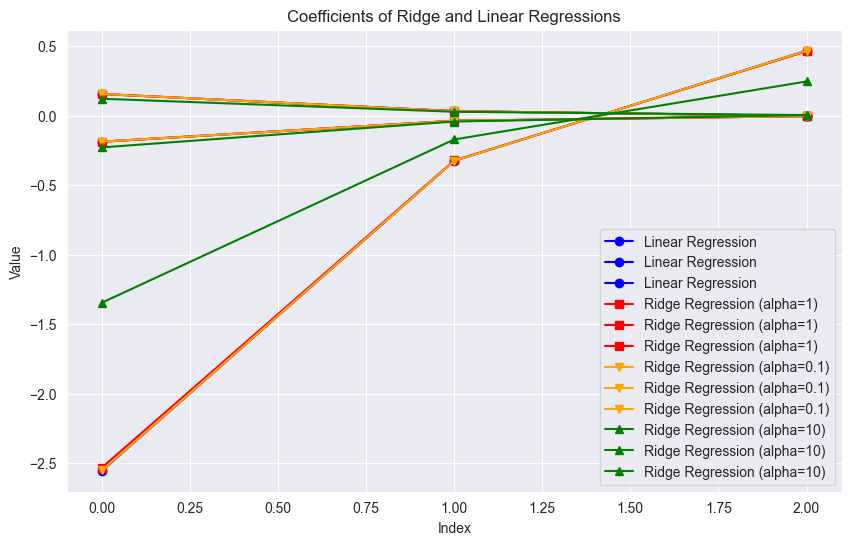

In [68]:
plt.figure(figsize=(10, 6))

plt.plot(lr.coef_, marker='o', label='Linear Regression', color='blue')
plt.plot(ridge.coef_, marker='s', label='Ridge Regression (alpha=1)', color='red')
plt.plot(ridge01.coef_, marker='v', label='Ridge Regression (alpha=0.1)', color='orange')
plt.plot(ridge100.coef_, marker='^', label='Ridge Regression (alpha=10)', color='green')

plt.xlabel('Index')
plt.ylabel('Value')

plt.title('Coefficients of Ridge and Linear Regressions')
plt.legend()
plt.show()

<h1>Lasso</h1>

In [69]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
lasso10 = Lasso(alpha=10, max_iter=100000).fit(X_train, y_train)
lasso100 = Lasso(alpha=100, max_iter=100000).fit(X_train, y_train)

In [70]:
import numpy as np

print("Correctness on the train set: {:.2f}".format(lasso.score(X_train,y_train)))
print("Correctness on the test set: {:.2f}".format(lasso.score(X_test,y_test)))   
print("Number of the used features: {}".format(np.sum(lasso.coef_ != 0)))

Correctness on the train set: 0.38
Correctness on the test set: -0.98
Number of the used features: 9


In [71]:
print("Correctness on the train set: {:.2f}".format(lasso10.score(X_train,y_train)))
print("Correctness on the test set: {:.2f}".format(lasso10.score(X_test,y_test)))   
print("Number of the used features: {}".format(np.sum(lasso10.coef_ != 0)))

Correctness on the train set: 0.32
Correctness on the test set: -0.69
Number of the used features: 7


In [72]:
print("Correctness on the train set: {:.2f}".format(lasso100.score(X_train,y_train)))
print("Correctness on the test set: {:.2f}".format(lasso100.score(X_test,y_test)))   
print("Number of the used features: {}".format(np.sum(lasso100.coef_ != 0)))

Correctness on the train set: 0.18
Correctness on the test set: -0.82
Number of the used features: 2


In [73]:
print("Lasso alpha=1 coef:", lasso.coef_)
print("Lasso alpha=0.1 coef:", lasso10.coef_)
print("Lasso alpha=10 coef:", lasso10.coef_)

Lasso alpha=1 coef: [[-2.41793776e+00 -1.91211673e-01  1.50793762e-01]
 [-1.91092700e-01 -4.09015711e-02  2.73433718e-02]
 [ 3.39561283e-01  5.69560772e-04  8.57127461e-04]]
Lasso alpha=0.1 coef: [[-1.21177587 -0.2241937   0.10658982]
 [-0.         -0.03825752  0.01107619]
 [ 0.          0.01184806  0.00785358]]
Lasso alpha=10 coef: [[-1.21177587 -0.2241937   0.10658982]
 [-0.         -0.03825752  0.01107619]
 [ 0.          0.01184806  0.00785358]]


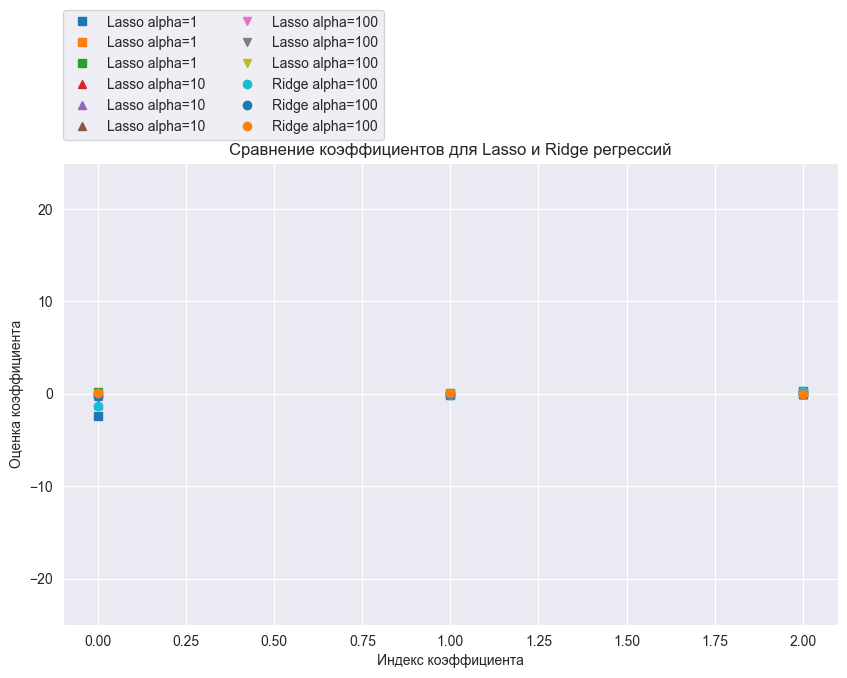

In [74]:
plt.figure(figsize=(10, 6))

plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso10.coef_, '^', label="Lasso alpha=10")
plt.plot(lasso100.coef_, 'v', label="Lasso alpha=100")
plt.plot(ridge100.coef_, 'o', label="Ridge alpha=100")

plt.legend(ncol=2, loc=(0, 1.05))

plt.ylim(-25, 25)
plt.title("Сравнение коэффициентов для Lasso и Ridge регрессий")
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.show()

<h1>LogisticRegression</h1>

In [77]:
from sklearn.linear_model import LogisticRegression
y_train = y_train[:, 0]  # Предполагается, что первый столбец - это целевая переменная
y_test = y_test[:, 0]
logreg = LogisticRegression(max_iter=10000, solver='sag').fit(X_train,y_train)
print("Correctness on the train set C=1: {:.3f}".format(logreg.score(X_train,y_train)))
print("Correctness on the test set C=1: {:.3f}".format(logreg.score(X_test,y_test))) 

Correctness on the train set C=1: 0.667
Correctness on the test set C=1: 0.000


In [80]:
logreg100 = LogisticRegression(C=100,max_iter=10000,solver='sag').fit(X_train,y_train)
print("Correctness on the train set C=100: {:.3f}".format(logreg100.score(X_train,y_train)))
print("Correctness on the test set C=100: {:.3f}".format(logreg100.score(X_test,y_test)))   

Correctness on the train set C=100: 0.667
Correctness on the test set C=100: 0.000


In [83]:
logreg001 = LogisticRegression(C=0.01,solver='sag',max_iter=10000).fit(X_train,y_train)
print("Correctness on the train set C=0.1: {:.3f}".format(logreg001.score(X_train,y_train)))
print("Correctness on the test set C=0.1: {:.3f}".format(logreg001.score(X_test,y_test))) 

Correctness on the train set C=0.1: 0.200
Correctness on the test set C=0.1: 0.000


In [ ]:
plt.plot(logreg.coef_.T, 's', label="C=1")
plt.plot(logreg100.coef_.T, 'v', label="C=100")
plt.plot(logreg001.coef_.T, '^', label="C=0.01")

plt.xticks(range(linnerud.data.shape[1]),linnerud.feature_names, rotation=90)
    
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.legend()
plt.show()